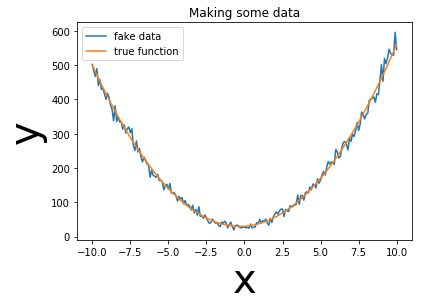

In [126]:
# Begining the General Linear Least Squares (Based on 15.4 in Numerical Recipes) 

%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt

# Going to create fake data for a simple (but non-linear function) and then fit to it
# --------------------Fit Function--------------------#
n_x = 201 # number of data points
n_M = 3   # number of basis functions (also number of fit parameters)
x = np.linspace(-10, 10, n_x)  # n_x linearly spaced numbers from -10 to 10
a = 5
b = 3
c = 30

y_fit = a*x**2 + b*x + c 

# --------------------Faking Data--------------------#

y_data = np.random.normal(y_fit, y_fit**.5) # Does this make sense? Ask Alejandro about this. Should it be y_fit**-.5? 


plt.plot(x, y_data, x, y_fit)  # Test plots
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlabel('x', fontsize = 40)
plt.ylabel('y', fontsize = 40)
plt.title("Making some data")
plt.gca().legend(('fake data', 'true function'))

plt.show()

In [127]:
#note that it will "remember" variables from above if you rerun the above script. Would be ideal  to be able to just import 
# this into another use, so not have any variables like 3 floating around

%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt
# --------------------Putting together the Toolbox 15.4.1-3--------------------#

P = np.ones(n_M) # M=3 fit parameters
X = np.array([x**2, x, np.ones(n_x)]).transpose() # basis functions. Careful with the basis function 1. Needs to be an array of length n_x
sigma = y_data**.5

# --------------------Creating A,b matricies NR 15.4.4-5--------------------#
A = np.zeros(shape=(n_x,n_M))
i=0
while i < n_M:
    A[:,i] = X[:,i]/sigma
    i += 1

b = y_data/sigma
alpha = A.transpose() @ A  #NR 15.5.8
beta = A.transpose() @ b   #NR 15.5.9


P = np.linalg.inv(alpha) @ beta

print(alpha)
print(beta)
print(P)


#print(X)
# print(beta.shape)
# print(alpha.shape)
# print(A.shape)
# print(b.shape)

# print(beta)
# print(alpha)
#x = np.linalg.solve(alpha, beta)

#print(x)

[[ 1.20416409e+03 -1.37076962e+01  2.74900108e+01]
 [-1.37076962e+01  2.74900108e+01 -5.79858509e-01]
 [ 2.74900108e+01 -5.79858509e-01  2.25627084e+00]]
[6.76700000e+03 1.39259297e-14 2.01000000e+02]
[ 4.99137682  3.1020623  29.06820997]


[[5.00104000e+00 1.66299015e-02 3.32528863e-03]
 [3.02553333e+00 9.84420026e-02 3.25370742e-02]
 [3.07873779e+01 6.94296101e-01 2.25513230e-02]
 [3.67003047e+02 2.25769838e+00 6.15171562e-03]]


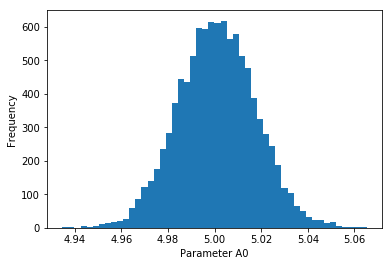

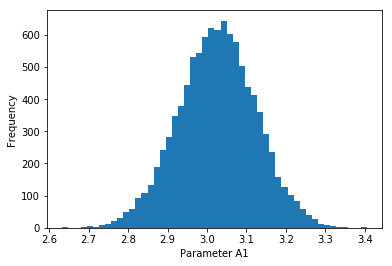

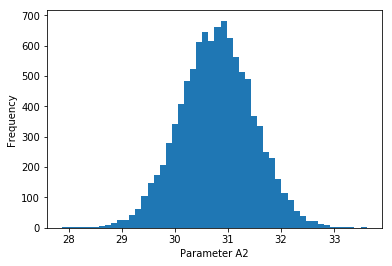

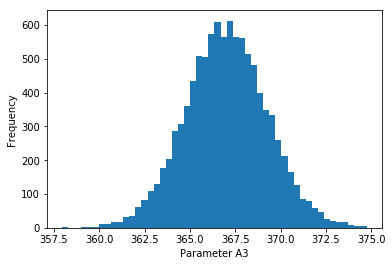

In [124]:
# All the machinery is in here. 
# TEST: Here I would like to fit to a new set of fake data with more basis functions.

%matplotlib inline  

import numpy as np
import matplotlib.pyplot as plt

# Going to create fake data for a simple (but non-linear function) and then fit to it
# --------------------Fit Function--------------------#
n_x = 201 # number of data points
n_M = 4   # number of basis functions (also number of fit parameters)
x = np.linspace(-10, 10, n_x)  # n_x linearly spaced numbers from -10 to 10
A0 = 5
A1 = 3
A2 = 31
A3 = 368

 

# --------------------Many Trials--------------------#

n_fits = 10000 # Sets of fake data analyzed 

P = np.zeros(shape=(n_M,n_fits)) # Fit parameters 
j = 0 

while j < n_fits: 
    # --------------------Faking Data--------------------#
    y_fit = A0*x**3 + A1*x**2 + A2*x + A3 
    y_data = np.random.normal(y_fit, abs(y_fit)**.5)  # Does this make sense? Ask Alejandro about this. Should it be y_fit**-.5? 


    # --------------------Putting together the Toolbox 15.4.1-3--------------------#

    X = np.array([x**3,x**2, x, np.ones(n_x)]).transpose() # basis functions. Careful with the basis function 1. Needs to be an array of length n_x
    sigma = abs(y_data)**.5 # How to deal with this when we have negatives? I guess it's unfair to use 1/sqrt(N) as the rel uncert.

    # --------------------Creating A,b matricies NR 15.4.4-5--------------------#
    A = np.zeros(shape=(n_x,n_M))
    i=0
    while i < n_M:
        A[:,i] = X[:,i]/sigma
        i += 1

    b = y_data/sigma
    alpha = A.transpose() @ A  #NR 15.5.8
    beta = A.transpose() @ b   #NR 15.5.9

    P[:,j] = np.linalg.inv(alpha) @ beta
    
    j += 1 

# --------------------statistics on P --------------------#    

P_stats = np.zeros(shape=(n_M,3))
l = 0
while l < n_M: 
    P_stats[l,0]= np.mean(P[l,:])
    P_stats[l,1]= np.std(P[l,:])
    P_stats[l,2]= np.std(P[l,:])/np.mean(P[l,:]) #Relative Uncertianty
    l += 1 
print(P_stats)
#print(P.transpose()) 
k = 0
while k < n_M: 
    plt.hist(P[k,:], bins=50)
    plt.ylabel('Frequency')
    plt.xlabel('Parameter A%d' % k)
    plt.show()
    k += 1 

# Questions: Why does it always underguess for parameters? Also why isn't the relative uncertainty the same for all of these parameters? 
# And does the fact that this goes negative totally mess with things? 